In [2]:
import random, pylab, numpy
random.seed(1)

Fraction within ~200 of mean = 0.9571469999999963


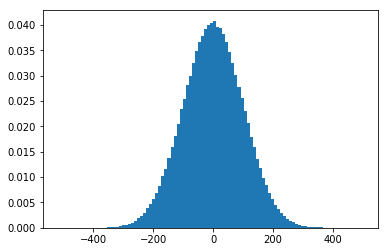

In [3]:
dist, numSamples = [], 1000000

for i in range(numSamples):
    dist.append(random.gauss(0, 100))

v = pylab.hist(dist, bins = 100, weights = [1/numSamples]*len(dist))
              
print('Fraction within ~200 of mean =', sum(v[0][30:70]))

In [6]:
v

(array([1.0000e-06, 0.0000e+00, 0.0000e+00, 1.0000e-06, 0.0000e+00,
        0.0000e+00, 1.0000e-06, 2.0000e-06, 2.0000e-06, 5.0000e-06,
        6.0000e-06, 1.7000e-05, 2.7000e-05, 4.2000e-05, 4.4000e-05,
        5.9000e-05, 8.8000e-05, 1.5100e-04, 1.6500e-04, 2.3100e-04,
        2.9400e-04, 4.5900e-04, 6.4700e-04, 8.3200e-04, 9.8800e-04,
        1.4360e-03, 1.9050e-03, 2.3410e-03, 2.9900e-03, 3.8220e-03,
        4.6460e-03, 5.6280e-03, 6.8750e-03, 8.2750e-03, 1.0156e-02,
        1.1662e-02, 1.3675e-02, 1.5924e-02, 1.8186e-02, 2.0527e-02,
        2.3355e-02, 2.5420e-02, 2.8114e-02, 2.9938e-02, 3.2534e-02,
        3.4795e-02, 3.6669e-02, 3.7831e-02, 3.9279e-02, 3.9965e-02,
        4.0431e-02, 4.0839e-02, 3.9575e-02, 3.9366e-02, 3.8157e-02,
        3.6698e-02, 3.4669e-02, 3.2445e-02, 3.0227e-02, 2.7783e-02,
        2.5626e-02, 2.3066e-02, 2.0570e-02, 1.7961e-02, 1.5973e-02,
        1.3518e-02, 1.1707e-02, 9.7550e-03, 8.4530e-03, 6.8740e-03,
        5.6180e-03, 4.5580e-03, 3.7050e-03, 2.89

Text(0.5,1,'Normal Distribution, mu = 0, sigma = 1')

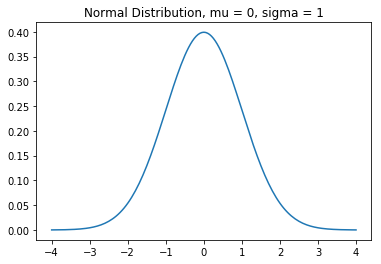

In [7]:
def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2
 
xVals, yVals = [], []
mu, sigma = 0, 1
x = -4
while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.05
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu) + ', sigma = ' + str(sigma))

In [10]:
import scipy.integrate

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print(' Fraction within', numStd, 'std =', round(area, 4))

checkEmpirical(3)

For mu = 4 and sigma = 10
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -7 and sigma = 6
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -2 and sigma = 9
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973


Mean of rolling 1 die = 2.498756875768418, Std = 1.4433018399078341
Mean of rolling 50 dice = 2.499870295810377, Std = 0.2029638516487054


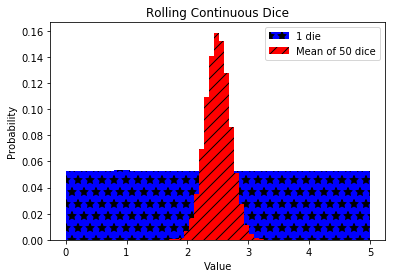

In [11]:
#Test CLT

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend, weights = [1/len(means)]*len(means), hatch = style)
    return getMeanAndStd(means)

mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

In [ ]:
##Test CLT
#numTrials = 1000000
#numSpins = 200
#game = FairRoulette()
#
#means = []
#for i in range(numTrials):
#    means.append(findPocketReturn(game, 1, numSpins,
#                                  False)[0])
#
#pylab.hist(means, bins = 19,
#           weights = [1/len(means)]*len(means))
#pylab.xlabel('Mean Return')
#pylab.ylabel('Probability')
#pylab.title('Expected Return Betting a Pocket 200 Times')

In [13]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(numNeedles))
    
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) + ', Std. dev. = ' + str(round(sDev, 6)) + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

random.seed(0)
estPi(0.005, 100)

Est. = 3.1484400000000012, Std. dev. = 0.047886, Needles = 1000
Est. = 3.1391799999999987, Std. dev. = 0.035495, Needles = 2000
Est. = 3.1410799999999997, Std. dev. = 0.02713, Needles = 4000
Est. = 3.141435, Std. dev. = 0.016805, Needles = 8000
Est. = 3.141355, Std. dev. = 0.0137, Needles = 16000
Est. = 3.1413137500000006, Std. dev. = 0.008476, Needles = 32000
Est. = 3.141171874999999, Std. dev. = 0.007028, Needles = 64000
Est. = 3.1415896874999993, Std. dev. = 0.004035, Needles = 128000
Est. = 3.1417414062499995, Std. dev. = 0.003536, Needles = 256000
Est. = 3.14155671875, Std. dev. = 0.002101, Needles = 512000


3.14155671875